# Fires widgets

This widget takes an Area of Interest (adm0, adm1, adm2) and requests the number of fires recorded in the last X number of days. The service is only able to look back as far as the last 7 days, however.

The widget should simply display a dynamic sentence showing the number of detected fires in the AOI over the last X number of days.

**NOTE**: The service is a little spotty and sometimes needs a few attempts to return a value

In [1]:
#Import Global Metadata etc

%run '0.Importable_Globals.ipynb'

In [2]:
from datetime import date
from datetime import timedelta
import datetime
import math


In [3]:
adm0 = 'CMR'
adm1 = 1
adm2 = None
threshold = 0
time_frame = 7  ##No of days up to a max of 7 (default)

i = '2018-01-16' ## Unused in widget, only here to show example
f = '2018-01-18'

In [4]:
# Example of adm1 request
url = f'https://production-api.globalforestwatch.org/v1/viirs-active-fires/admin/{adm0}/{adm1}'
properties = {
              "period" : i + ',' + f,
              "thresh" : threshold}
r = requests.get(url=url, params=properties)

print(r.url)
print(f'Status: {r.status_code}')

data = r.json().get('data').get('attributes').get('value')

pprint(data)

https://production-api.globalforestwatch.org/v1/viirs-active-fires/admin/CMR/1?period=2018-01-16%2C2018-01-18&thresh=0
Status: 200
1812


In [5]:
# Example of adm0 request
url = f'https://production-api.globalforestwatch.org/v1/viirs-active-fires/admin/{adm0}'
properties = {
              "period" : i + ',' + f,
              "thresh" : threshold}
r = requests.get(url=url, params=properties)

print(r.url)
print(f'Status: {r.status_code}')

data = r.json().get('data').get('attributes').get('value')

pprint(data)

https://production-api.globalforestwatch.org/v1/viirs-active-fires/admin/CMR?period=2018-01-16%2C2018-01-18&thresh=0
Status: 200
6175


# Functions

In [6]:
def get_geostore(iso, adm1=None, adm2=None):
    """Returns geostore of adm region. Here, it is only required for adm2 since
    the VIIRS service only has endpoints for adm0 and adm1 regions"""
   
    if adm2:
        print('Request for adm2 area')
        url =f'https://api.resourcewatch.org/v1/geostore/admin/{iso}/{adm1}/{adm2}' 
    elif adm1:
        print('Request for adm1 area')
        url =f'https://api.resourcewatch.org/v1/geostore/admin/{iso}/{adm1}' 
    elif iso:
        print('Request for adm0 area')
        url =f'https://api.resourcewatch.org/v1/geostore/admin/{iso}'
        
    r = requests.get(url)
    data = r.json().get('data').get('id')
    
    return data

In [7]:
def fires_queries(start_date, end_date, iso, adm1=None, adm2=None):
    """Returns the ncorrect url and params for the VIIRS query. Adm2 requires a geostore
    as the VIIRS service only has endpoints for adm0 and adm1 regions"""
    
    if adm2:
        url = f'https://production-api.globalforestwatch.org/v1/viirs-active-fires'
        properties = {
              "geostore" : get_geostore(iso, adm1, adm2),
              "period" : start_date + ',' + end_date,
              "thresh" : threshold}
    elif adm1:
        url = f'https://production-api.globalforestwatch.org/v1/viirs-active-fires/admin/{iso}/{adm1}'   
        properties = {
              "period" : start_date + ',' + end_date,
              "thresh" : threshold}
    elif iso:
        url = f'https://production-api.globalforestwatch.org/v1/viirs-active-fires/admin/{iso}'
        properties = {
              "period" : start_date + ',' + end_date,
              "thresh" : threshold}
    
    return (url, properties)

In [8]:
def time_period(time_frame=7):
    """Returns a start- and end-date to be passed to query in 'yyyy-mm-dd' format
    where the start date is the current date (today). Defaults to the last week (days=7)"""
    
    today = date.today()
    
    start = today.strftime('%Y-%m-%d')
    end = (today - timedelta(days=time_frame)).strftime('%Y-%m-%d') 
    
    return (start, end)

In [9]:
counts = []

#Get start and end dates
start_date = time_period(time_frame)[1]
end_date = time_period(time_frame)[0]

#Get url and params for requests
url = fires_queries(start_date, end_date, adm0, adm1, adm2)[0]
params = fires_queries(start_date, end_date, adm0, adm1, adm2)[1]

r = requests.get(url, params)

print(r.url)
print(f'Status: {r.status_code}')

#Return no of fires detected (counts)
counts.append(r.json().get('data').get('attributes').get('value'))

print(counts)

https://production-api.globalforestwatch.org/v1/viirs-active-fires/admin/CMR/1?period=2018-01-12%2C2018-01-19&thresh=0
Status: 200
[3883]


In [29]:
counts = []

for i in [7,5,3,1]:
    
    #Get start and end dates
    start_date = time_period(i)[1]
    end_date = time_period(i)[0]

    #Get url and params for requests
    url = fires_queries(start_date, end_date, adm0, adm1, adm2)[0]
    params = fires_queries(start_date, end_date, adm0, adm1, adm2)[1]

    r = requests.get(url, params)

    print(r.url)
    print(f'Status: {r.status_code}')

    #Return no of fires detected (counts)
    counts.append(r.json().get('data').get('attributes').get('value'))

print(counts)

https://production-api.globalforestwatch.org/v1/viirs-active-fires/admin/CMR/1?period=2018-01-12%2C2018-01-19&thresh=0
Status: 200
https://production-api.globalforestwatch.org/v1/viirs-active-fires/admin/CMR/1?period=2018-01-14%2C2018-01-19&thresh=0
Status: 200
https://production-api.globalforestwatch.org/v1/viirs-active-fires/admin/CMR/1?period=2018-01-16%2C2018-01-19&thresh=0
Status: 200
https://production-api.globalforestwatch.org/v1/viirs-active-fires/admin/CMR/1?period=2018-01-18%2C2018-01-19&thresh=0
Status: 200
[3883, 3748, 2479, 678]


# Graph

Shows 'today' and countes/per using 2 day ave over the last week.

In [30]:
# Calculate counts per day in each 2-day period over last week

counts[0] = (counts[0] - counts[1])/2
counts[1] = (counts[1] - counts[2])/2
counts[2] = (counts[2] - counts[3])/2

# ['day 1', 'day 2-3 ave', 'day 4-5 ave', 'day5-7']
counts

[67.5, 634.5, 900.5, 678]

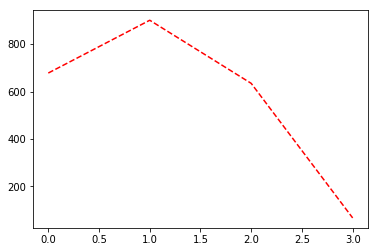

In [31]:
# Reverse the order using 'counts[::-1]'

plt.plot(counts[::-1], 'r--')

plt.show()

# Dynamic Sentence

In [11]:
# get a human readable {id: name} json for either admin 1 or 2 level as needed:

areaId_to_name = None
if adm2:
    tmp = get_admin2_json(iso=adm0, adm1=adm1)
    areaId_to_name ={}
    for row in tmp:
        areaId_to_name[row.get('adm2')] = row.get('name')
if adm1 and not adm2:
    tmp = get_admin1_json(iso=adm0)
    areaId_to_name={}
    for row in tmp:
        areaId_to_name[row.get('adm1')] = row.get('name') 

In [12]:
if adm2:
    print(f"In {areaId_to_name[adm2]}, {iso_to_countries[adm0]} ", end="")
elif adm1: 
    print(f"In {areaId_to_name[adm1]}, {iso_to_countries[adm0]} ", end="")
elif adm0:
    print(f"In {iso_to_countries[adm0]} ", end="")

# Handle 'day' vs. 'days'
if time_frame > 1:
    plural = 's'
else:
    plural = ''

# Say 'no fires' instead of '0 fires'
if counts == 0:
    counts = 'no'
    
print(f"there were {counts} active fires detected in the last {time_frame} day{plural}.", end="")

In Adamaoua, Cameroon there were [678, 2479, 3748, 3883] active fires detected in the last 7 days.